#Data Preprocessing

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/imdb-videogames.csv")

In [45]:
data.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [46]:
data.shape

(20803, 17)

In [47]:
data.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [48]:
# Data Cleaning
data = data.dropna()
data = data.drop_duplicates()

# Feature Selection
data = data[["year", "certificate", "rating", "votes", "Action", "Adventure", "Comedy", "Crime", "Family", "Fantasy", "Mystery", "Sci-Fi", "Thriller"]]

# Data Transformation
# Label Encoding for categorical variables
data['certificate'] = LabelEncoder().fit_transform(data['certificate'])

In [49]:
# Data Normalization
scaler = MinMaxScaler()
# convert the votes column to numeric before applying normalization
data["votes"] = pd.to_numeric(data["votes"].str.replace(",",""))
data[["year", "rating", "votes"]] = scaler.fit_transform(data[["year", "rating", "votes"]])

In [50]:
# Data Split
train_data, test_data, train_target, test_target = train_test_split(data.drop(["rating"], axis=1), data[["rating"]], test_size=0.2, random_state=42)



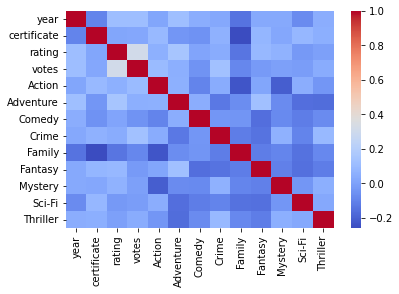

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr = data.corr()

# create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

# show the plot
plt.show()

#Model Implemntation

#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(train_data, train_target)

# Make predictions on the test set
predictions = log_reg.predict(test_data)

# Convert test_target to binary labels
test_target = (test_target >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))





Accuracy: 94.17%


In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)
print(conf_matrix)

[[   0   77]
 [   0 1243]]


#Model Tuning (logistic)

In [ ]:
# Define the parameter grid
param_grid = {'solver': ['lbfgs'], 'penalty': ['l2', 'l1'], 'C': [0.5, 1, 2, 3, 5], 'max_iter': [1000, 5000, 10000, 20000]}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state = 0)

# Create the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(train_data, train_target)

# Summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best: nan using {'C': 0.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 20000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.5, 'max_iter': 20000, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1, 'max_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1554, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

------------------------------------------------------------------------------

#ANN Model Implementation

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Convert data types
train_data = train_data.astype('float32')
train_target = train_target.astype('float32')
test_data = test_data.astype('float32')
test_target = test_target.astype('float32')

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Dense(32, input_shape=(train_data.shape[1],), activation='relu')) # input layer
model.add(Dense(64, activation='relu')) # hidden layer
model.add(Dense(1, activation='linear')) # output layer

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_target, epochs=50, batch_size=32, validation_data=(test_data, test_target), verbose=1)




/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9047 - val_loss: 0.0622 - val_accuracy: 0.9417
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9400 - val_loss: 0.0605 - val_accuracy: 0.9417
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9400 - val_loss: 0.0573 - val_accuracy: 0.9417
Epoch 4/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9400 - val_loss: 0.0561 - val_accuracy: 0.9417
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9400 - val_loss: 0.0572 - val_accuracy: 0.9417
Epoch 6/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9401 - val_loss: 0.0613 - val_accuracy: 0.9417
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9401 - val_loss: 0.0569 - val_accuracy: 0.9417
Epoch 

In [33]:
# Evaluation on test set
y_pred = model.predict(test_data)
mse = mean_squared_error(test_target, y_pred)
r2 = r2_score(test_target, y_pred)

# Calculate accuracy
accuracy = model.evaluate(test_data, test_target, verbose=0)

print("Mean squared error: ", mse)
print("R-squared: ", r2)
print("Accuracy: ", accuracy[1])

42/42 [==============================] - 0s 1ms/step
Mean squared error:  0.05758429
R-squared:  -0.048310705504150286
Accuracy:  0.9416666626930237


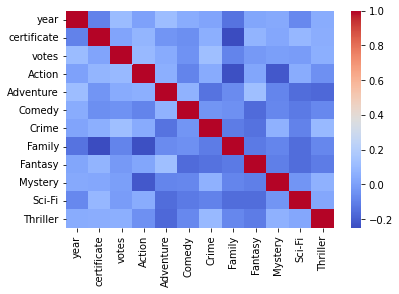

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr = train_data.corr()

# create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

# show the plot
plt.show()


#Model Tuning(ANN)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from keras.layers import Dropout

# Create a function to build the model
def create_model(hidden_neurons=32, learning_rate=0.001, dropout=0.0):
    model = Sequential()
    model.add(Dense(hidden_neurons, input_shape=(train_data.shape[1],), activation='relu')) # input layer
    model.add(Dropout(dropout))  # add dropout layer to prevent overfitting
    model.add(Dense(64, activation='relu')) # hidden layer
    model.add(Dense(1, activation='linear')) # output layer
    model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Create an instance of the model
model = KerasRegressor(build_fn=create_model)

# Define the parameter grid
param_grid = {'hidden_neurons': uniform(10, 50),
              'learning_rate': uniform(0.0001, 0.01),
              'dropout': uniform(0, 0.5)}

# Create the randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=3, verbose=1, n_jobs=-1)
random_result = random_search.fit(train_data, train_target)




Fitting 3 folds for each of 100 candidates, totalling 300 fits


<ipython-input-84-13b80fb6f284>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


165/165 [==============================] - 1s 2ms/step - loss: 0.0419 - mean_absolute_error: 0.1147


In [ ]:
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.002200 using {'dropout': 0.12672402304971825, 'hidden_neurons': 14.035603118491892, 'learning_rate': 0.009143792675169632}
-0.085803 (0.020425) with: {'dropout': 0.3012425476080905, 'hidden_neurons': 57.79853459349186, 'learning_rate': 0.0003976866324535388}
-0.020885 (0.002870) with: {'dropout': 0.23147486604062334, 'hidden_neurons': 37.78025509711273, 'learning_rate': 0.0025523941915289246}
-0.034302 (0.017521) with: {'dropout': 0.36816363403750463, 'hidden_neurons': 47.64558334635554, 'learning_rate': 0.007338157547852854}
-0.043191 (0.024021) with: {'dropout': 0.3832574408894506, 'hidden_neurons': 52.15429643219593, 'learning_rate': 0.003043284869841598}
-0.012104 (0.005361) with: {'dropout': 0.06546018372972706, 'hidden_neurons': 23.035429885743927, 'learning_rate': 0.00566770356692767}
-0.038404 (0.018705) with: {'dropout': 0.39775560419224004, 'hidden_neurons': 57.54003700010252, 'learning_rate': 0.0037387712132742365}
-0.010791 (0.000519) with: {'dropout': 0.4234216453

#RNN Model Implementation 

Epoch 1/50
165/165 [==============================] - 6s 11ms/step - loss: 0.0649 - accuracy: 0.0017 - val_loss: 0.0170 - val_accuracy: 0.0015
Epoch 2/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0235 - accuracy: 0.0017 - val_loss: 0.0163 - val_accuracy: 0.0015
Epoch 3/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0213 - accuracy: 0.0017 - val_loss: 0.0154 - val_accuracy: 0.0015
Epoch 4/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0201 - accuracy: 0.0017 - val_loss: 0.0151 - val_accuracy: 0.0015
Epoch 5/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0196 - accuracy: 0.0017 - val_loss: 0.0149 - val_accuracy: 0.0015
Epoch 6/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0188 - accuracy: 0.0017 - val_loss: 0.0148 - val_accuracy: 0.0015
Epoch 7/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0187 - accuracy: 0.0017 - val_loss: 0.0145 - val_accuracy: 0.0015
Epoch

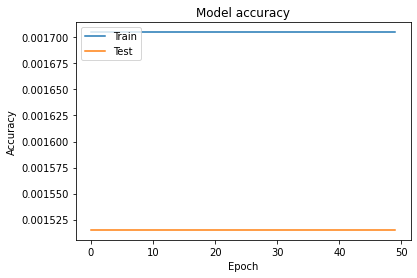

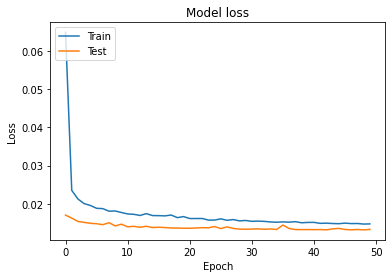

42/42 [==============================] - 1s 2ms/step
Mean squared error:  0.013320902
R-squared:  0.1926791112999231
Accuracy: 0.15%


In [53]:
from keras.layers import LSTM, Dropout
from sklearn.metrics import accuracy_score

# Convert data types
train_data = train_data.astype('float32')
train_target = train_target.astype('float32')
test_data = test_data.astype('float32')
test_target = test_target.astype('float32')

# Reshape the data for RNN
train_data = train_data.values.reshape((train_data.shape[0], 1, train_data.shape[1]))
test_data = test_data.values.reshape((test_data.shape[0], 1, test_data.shape[1]))

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(LSTM(32, input_shape=(train_data.shape[1], train_data.shape[2]), return_sequences=True)) # input layer
model.add(Dropout(0.2))
model.add(LSTM(64)) # hidden layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear')) # output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_target, epochs=50, batch_size=32, validation_data=(test_data, test_target), verbose=1)


# Plot the accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss over the epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#Evaluation on test set

y_pred = model.predict(test_data)
mse = mean_squared_error(test_target, y_pred)
r2 = r2_score(test_target, y_pred)

print("Mean squared error: ", mse)
print("R-squared: ", r2)


#Print the final accuracy of the model

scores = model.evaluate(test_data, test_target, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



#Model Tuning (RNN)

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Create a function to build the RNN model
def create_rnn_model(num_layers=1, hidden_neurons=32, learning_rate=0.001):
    model = Sequential()
    for i in range(num_layers):
        model.add(LSTM(hidden_neurons, input_shape=(train_data.shape[1], train_data.shape[2]), return_sequences=True))
        model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    return model

# Create an instance of the model
model = KerasClassifier(build_fn=create_rnn_model, epochs=50, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {'num_layers': [1, 2, 3],
              'hidden_neurons': [32, 64, 128],
              'learning_rate': [0.001, 0.01, 0.1]}

# Create the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(train_data, train_target)

# Summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-54-dac348800659>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_rnn_model, epochs=50, batch_size=32, verbose=0)
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
